# Introduction
Meetup.com was created with an objective to effectively gather people together for a pre-defined objective, to streghten communities. It is the world's largest network of local groups. Meetup’s mission is to ‘revitalize local community and help people around the world to self organize.’ The data available on meetup.com could be used to study the activity of the local community in the city as well as the evolution of the trend of such activites.
This tutorial will teach you to make queries based on your interests and then collect, analyze and visualize data. This can have various applications such as determining the perfect city or compnaring multiple cites, based on your interests. 

## Tutorial Content

In this tutorial, we will show how to fetch data, perform basic data analysis and visulization in Python, specifically using pandas, meetup-api and matplotlib libraries. The meetup-api library provides a way to make our quries cleaner and useful methods to obtain the required data. It is totally possible to collect the same data without this library. 
For full sepcification of API, refer https://www.meetup.com/meetup_api/docs/. It is also extremely helpful to use the API console(https://secure.meetup.com/meetup_api/console) which is a RESTful API client similar to Postman. All the different API versions can be tested with different request parameters and the response can be obtained. This usually helps to find out if the interpretation of an API method is correct and it will give the information we are looking for.

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Retrieve API Key](#Retrive-API-Key)
- [API Requests](#API-Requests)
- [Showing Equivalency of Different Request Methods](#Showing-Equivalency-of-Different-Request-Methods)
- [Search City/Cities](#Search-City/Cities)
- [The ONLY Request Parameter](#The-ONLY-Request-Parameter)
- [Getting Group Data](#Getting-Group-Data)
- [Getting Event Details](#Getting-Event-Details)
- [Quantitative Analysis](#Quantitative-Analysis)
- [Qualitative Analysis](#Qualitative-Analysis)

## Installing the libraries
Install the libraries mentiones earlier using the foollowing commands in terminal:<br>
- pip install pandas <br>
- pip install matplotlib <br>
- pip install meetup-api
- pip install requests
- pip install json

In [1]:
# Now we will import the required libraries
import pandas as pd
import meetup.api
import matplotlib.pyplot as plt
import requests
import json

## Retrive API Key
After making an account meetup.com, visit https://secure.meetup.com/meetup_api/key/ to obtain your API key. This key will be required to make the any request the backend server of the website.

## API Requests

To get us started we will first load data using the api library and using the meetup.api library to generate the HTTP requests. Meetup has several categories and we will use the the API for getting all the categories on meetup. The API documentation for GET /2/categories specifies that the request takes no parameters and the response is a JSON object. The objects attributes give us all the meetup categories and meta data containing additional information of the API response.

In [2]:
#using requests library
params = {"key": 'INSERT YOUR API KEY HERE' } # INSERT RETRIVED API KEY HERE(instructions posted in earlier section)
r = requests.get('https://api.meetup.com/2/categories', params = params)
temp_dict = {}
temp_dict['categories'] = []
response = json.loads(r.content.decode('UTF-8')) #converting a string to json/dict format

for result in response['results']:
    temp_dict['categories'].append(result['name'])
    
categories_df = pd.DataFrame()    
categories_df = categories_df.from_dict(temp_dict, orient='columns')
categories_df

,categories
0,Arts & Culture
1,Book Clubs
2,Career & Business
3,Cars & Motorcycles
4,Community & Environment
5,Dancing
6,Education & Learning
7,Fashion & Beauty
8,Fitness
9,Food & Drink


All the categories of meetups have been displayed above as a pandas dataframe.

## Showing Equivalency of Different Request Methods

Now, we will use meetup.api library to perform the same GET request as above. We make a class object using the API key for authorization and use GetCategories() to perform the request.

In [3]:
client = meetup.api.Client('INSERT YOUR API KEY HERE')  # INSERT RETRIVED API KEY HERE(instructions posted in earlier section)
print(client.GetCategories().results == response['results']) #shows that both methods of accessing api methods are equivalent

28/30 (10 seconds remaining)
True


**Note: The above output message 28/30 (10 seconds remaining), is a part of how the Client class functions and approximates how much time it takes to retrieve data. Ignore these statements for the purpose of this tutorial.**

## Search City/Cities
The GetCities() function is to use the GET /2/cities API, and gives us upto 10 cities. The ranking is based on the request parameters. In the example shown below, we set page to 1 to get the most relevant value. We specify query in city and the specify the state. The results are stored in an array. The same search can also be done using lattitute and longitude as input parameters. Refer to the API documentation for more information on request parameters.

In [4]:
pitts = client.GetCities(query = 'Pittsburg', state = 'PA', page =1) #set page=1 to get most relevant value for city search
mv = client.GetCities(query = 'San Francisco', state = 'CA', page =1)

#Displaying the results
print('Pittsburg Meetup User Count: ', end ='')
print(pitts.results[0]['member_count'])
print('Mountain View Meetup User Count: ', end ='')
print(mv.results[0]['member_count'])

27/30 (10 seconds remaining)
26/30 (10 seconds remaining)
Pittsburg Meetup User Count: 20814
Mountain View Meetup User Count: 60351


## The ONLY Request Parameter
A lot of the GET requests used for data collection, returns a lot of response parameters. We usually do not need a lot of these parameters for analysis. The only request parameter helps omit the response parameters we do not need. 

To show the use of the parameter we will make us of the API: GET /2/concierge using GetConcierge() function from meetup.api library. This API recommends upcoming meetups for the authorized member in a given location and in their groups.

In [5]:
concierge = client.GetConcierge()
concierge.results[0]

25/30 (10 seconds remaining)


{'duration': 50400000,
 'group': {'created': 1240357927000,
  'group_lat': 37.380001068115234,
  'group_lon': -122.08000183105469,
  'id': 1440357,
  'join_mode': 'approval',
  'name': 'San Jose/Peninsula Volleyball Meetup Group',
  'urlname': 'San-Jose-Peninsula-Volleyball-Meetup-Group',
  'who': 'Volleyball players'},
 'id': '249159138',
 'name': 'Saturday Volleyball, 11:15-7:00, Las Palmas',
 'time': 1522520100000,
 'utc_offset': -25200000,
 'visibility': 'public_limited',
 'waitlist_count': 0,
 'yes_rsvp_count': 29}

In [6]:
concierge = client.GetConcierge(only = 'name')
concierge.results[0]

24/30 (9 seconds remaining)


{'name': 'Saturday Volleyball, 11:15-7:00, Las Palmas'}

## Getting Group Data
There is a meetup called PGH Data Science(https://www.meetup.com/PGH-Data-Science/) in Pittsburgh, PA. We could use some API methods to find out more information about a particular group. This will help us get comfortable in retrieving data using APIs so that these methods could be extended to access information of hundreds of groups. 

The first method that we will try out is GET /:urlname using the GetGroups() function from meetup.api library. In this case the URL name for the group is 'PGH-Data-Science'

In [7]:
group = client.GetGroup({"urlname": 'PGH-Data-Science'}) #urlname has to be dict as per documentation
print(dir(group))

23/30 (9 seconds remaining)
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'category', 'city', 'country', 'created', 'description', 'id', 'join_mode', 'key_photo', 'lat', 'link', 'localized_country_name', 'localized_location', 'lon', 'members', 'meta_category', 'name', 'next_event', 'organizer', 'state', 'status', 'timezone', 'urlname', 'visibility', 'who']


The attributes of the Client object have been printed above. We will now display the group description, member count, and next event

In [8]:
print("Group Description: ", end ='')
print(group.description)
print("Number of members: ", end ='')
print(group.members)
print("Next Upcoming Event: ", end ='')
print(group.next_event)

Group Description: <p>This group is for data scientists, data engineers, big data workers, data analysts, and people that want to get into these fields. We are not focused on specific tools or platforms, but rather have open discussions about anything/everything in the data/analytics space. Whether you work in Scala/Python/R/Java/.NET, Hadoop/SQL/Oracle/Teradata, or Excel/Tableau, we can learn from each other.</p>
Number of members: 873
Next Upcoming Event: {'id': '249129128', 'name': '... From Scratch', 'yes_rsvp_count': 30, 'time': 1524178800000, 'utc_offset': -14400000}


## Getting Event Details

Now for a given group we will obtain data for both past and future events planned by the group PGH Data Science. The API that will be used is GET https://api.meetup.com/2/events. The function defined for this purpose in the meetup.api library is called getEvents(). It takes several input parameters, which needs at least one of REQUIRED parameters to be passed. In this case we will use the group urlname, that is 'PGH-Data-Science'. We also use a optional parameter called status, that is used to request upcoming, past, proposed, suggested, cancelled, or draft events. For more details on required and optional parameters refer API documentation(https://www.meetup.com/meetup_api/docs/2/events/). 
The data we are specifically interested in this case is the number of people planning to attend the event which is given by 'yes_rsvp_count' response parameter. 

22/30 (9 seconds remaining)
21/30 (8 seconds remaining)


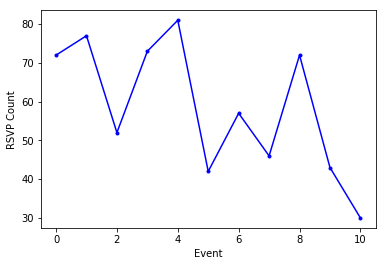

In [9]:
events_past = client.GetEvents(group_urlname = 'PGH-Data-Science',status = 'past', only = 'yes_rsvp_count')#Getting past events
events_upcoming = client.GetEvents(group_urlname = 'PGH-Data-Science',status = 'upcoming', only = 'yes_rsvp_count')#Getting upcoming events
events = events_past.results + events_upcoming.results #concatenating both arrays

df = pd.DataFrame(events)#load json dict into dataframe
plt.xlabel('Event')
plt.ylabel('RSVP Count')
plt.plot(range(len(df)), df.as_matrix().flatten(), '.b-')

The above scatter plot shows the number of people who signed up for the 10 most recent past events and an upcoming event. A further analysis of this data could reveal important details like the days of the week that get most RSVPs, or the venue of event that gets more members to attend.

## Quantitative Analysis

Before we begin retrieving data, the API for retireving all the groups for a given topic(s) is done by calling the function getGroups() from the meetup.api library. The parameter for the function are topics, latitute, longitude, radius(default =25 miles), and offset(because maximum number of groups that can be fetched at a time is 200) 

To get the coordinates we will use Nominatim for the geopy library. We will also test this function to get the coordinates for Pittsburg, PA

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim() #create object
coordinates = geolocator.geocode('pittsburg, pa')
print('Latitude: ', end='')
print(coordinates.latitude)

print('Longitude: ', end='')
print(coordinates.longitude)

Latitude: 40.4416941
Longitude: -79.9900861


Here we will make a list of cities we are interested in finding out more information on. We will compare 4 big US cities and see which city has more 'yoga' meetup groups. We use the Client.GetGroups() function to get the respective meetgroups.
To further explain, the function client.GetGroups(topic = 'yoga, lat = 40.4416941, lon = -79.9900861,radius = 100, page=200, offset=0) is the same as GET https://api.meetup.com/2/categories?topic=yoga&lat=79.18&long=&radius=100&page=200&offset=0

20/30 (6 seconds remaining)
19/30 (5 seconds remaining)
18/30 (4 seconds remaining)
17/30 (2 seconds remaining)
16/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (9 seconds remaining)
27/30 (8 seconds remaining)
26/30 (7 seconds remaining)
25/30 (5 seconds remaining)
24/30 (4 seconds remaining)
23/30 (3 seconds remaining)
22/30 (2 seconds remaining)
21/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (9 seconds remaining)
27/30 (8 seconds remaining)


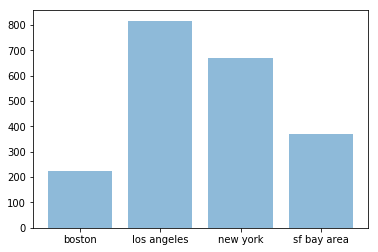

In [11]:
cities = ['sf bay area', 'los angeles', 'new york', 'boston']

topic = 'yoga'

#Plots the number of meetups for a topic for a list of cities
def plotCityMeetup(topic, cities):
    cities_coord = []
    group_count = [] #array that holds the count of each city
    for city in cities:
        cities_coord = geolocator.geocode(city)
        finish = False
        temp_count = 0
        offset = 0 
        while(not(finish)): #loop to offset pages
            city_groups = client.GetGroups(topic = topic, lat = cities_coord.latitude, lon = cities_coord.longitude,radius = 100, page=200, offset=offset)
            #the above line is equilvalent too GET https://api.meetup.com/2/categories?topic=yoga&lat=79.18&long=-122&radius=100&page=200&offset=0
            if(len(city_groups.results) == 0):
                finish = True
            temp_count += len(city_groups.results)
            offset += 1
        group_count.append(temp_count)
    plt.bar(cities, group_count, align='center', alpha=0.5)
    plt.show()

plotCityMeetup(topic, cities)


The above plot shows the number of meetup groups associated with the topic yoga in four major cities,

As a part of quantitative analysis we will use the same API and write function to see the total number of meetup members associated with a given topic around each of the four cities mentioned earlier.

26/30 (6 seconds remaining)
25/30 (5 seconds remaining)
24/30 (4 seconds remaining)
23/30 (2 seconds remaining)
22/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (9 seconds remaining)
27/30 (8 seconds remaining)
26/30 (7 seconds remaining)
25/30 (6 seconds remaining)
24/30 (5 seconds remaining)
23/30 (4 seconds remaining)
22/30 (3 seconds remaining)
21/30 (2 seconds remaining)
20/30 (0 seconds remaining)
29/30 (10 seconds remaining)
28/30 (9 seconds remaining)
[124281, 336564, 319661, 99196]


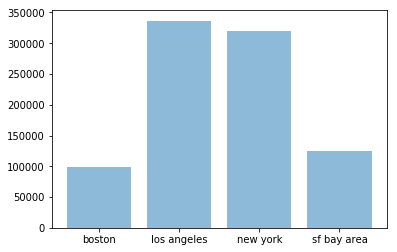

In [12]:
def city_group_members(topic, cities):
    cities_coord = []
    group_data = []
    members_count_array = []
    for city in cities:
        cities_coord = geolocator.geocode(city)
        avg = 0
        offset = 0 
        temp_count = 0
        temp_group_data = []
        while(True): #loop for offsetting through each page of upto 200 groups
            city_groups = client.GetGroups(topic = topic, lat = cities_coord.latitude, lon = cities_coord.longitude,radius = 100, page=200, offset=offset, only = 'members')
            if(len(city_groups.results) == 0):
                break;
            temp_group_data += city_groups.results
            offset += 1
        group_data.append(temp_group_data)

    for i, group in enumerate(group_data):
        all_df = pd.DataFrame(group)
        members_count_array.append(int(all_df.sum()))
    print(members_count_array)
   
    plt.bar(cities, members_count_array, align='center', alpha=0.5)
    plt.show()

city_group_members(topic, cities)

The above plot shows the number of people who are members of a group that is associated with the topic yoga. This can help people like yoga instructors who would wish to relocate, or the one's relocating for other reasons but consider Yoga an integral part of thier lifestyle.

## Qualitative Analysis
Earlier we did a quantitative analysis in determining which city had a higher number of meetups for a specific interest. Now we do a qualitative analysis using the average group ratings for a particular city.

In [13]:
#find average meetup rating of each city for a given topic
def qualitative(topic, cities):
    cities_coord = []
    group_data = []
    for city in cities:
        cities_coord = geolocator.geocode(city)
        finish = False
        avg = 0
        offset = 0 
        temp_count = 0
        temp_group_data = []
        while(True): #loop for offsetting through each page of upto 200 groups
            city_groups = client.GetGroups(topic = topic, lat = cities_coord.latitude, lon = cities_coord.longitude,radius = 100, page=200, offset=offset, only ='rating')
            if(len(city_groups.results) == 0):
                break;
            temp_group_data += city_groups.results
            offset += 1
        group_data.append(temp_group_data)
        
    avg_array = []
    print('')
    print('===Mean===')
    for i, group in enumerate(group_data):
        all_df = pd.DataFrame(group)
        ratings_df = all_df['rating']
        mean = ratings_df.mean()
        print(cities[i] + ': '+ str(mean))
qualitative(topic, cities)

27/30 (8 seconds remaining)
26/30 (7 seconds remaining)
25/30 (6 seconds remaining)
24/30 (4 seconds remaining)
23/30 (3 seconds remaining)
22/30 (2 seconds remaining)
21/30 (1 seconds remaining)
29/30 (10 seconds remaining)
28/30 (9 seconds remaining)
27/30 (8 seconds remaining)
26/30 (7 seconds remaining)
25/30 (6 seconds remaining)
24/30 (5 seconds remaining)
23/30 (4 seconds remaining)
22/30 (2 seconds remaining)
21/30 (1 seconds remaining)
20/30 (0 seconds remaining)

===Mean===
sf bay area: 2.8783602150537635
los angeles: 2.7564259485924114
new york: 2.7829895366218236
boston: 3.076991150442478


The average rating for each city is mentioned above.

## Summary and References

This tutorial highlighted most of the features that the Meetup-API offers from a data science perspective and focussed on the data obtained through GET requests. The applications of these API methods can be extended to other fields and to make changes to the website, such as commenting and RSVPing to an event, POST request methods could be used. The meetup.api library has functions for the same purpose too. A lot of other information on the libraries used and the APIs can be obtained from the resources mentioned below. The Meetup-API console is particularly helpful for quickly testing the APIs and analyzing the API methods.

1. Meetup.com: https://www.meetup.com/
2. Meetup-API Python library: https://meetup-api.readthedocs.io/
3. Meetup API Console: https://secure.meetup.com/meetup_api/console/
4. Geopy Geocoders: https://geopy.readthedocs.io/en/stable/